In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
label_encoder = LabelEncoder()
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(random_state=42)




In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

label_encoder = LabelEncoder()


In [238]:
df=pd.read_csv("apple_quality.csv")

In [239]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [341]:
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,1
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,0
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,1
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,0
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,0


In [342]:
df.columnsumns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [242]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [243]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [244]:
df.shape


(4001, 9)

In [245]:
df_clean =df[df['Acidity'] != 'Created_by_Nidula_Elgiriyewithana']

In [246]:
cm=df_clean.corr(numeric_only=True)

In [247]:
nan_columns_Trn = df.columns[df.isna().any()].tolist()
if nan_columns_Trn:
    print("Training dataset contains NaN values in columns:", nan_columns_Trn)
else:
    print("Training dataset does not contain any NaN values.")

Training dataset contains NaN values in columns: ['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Quality']


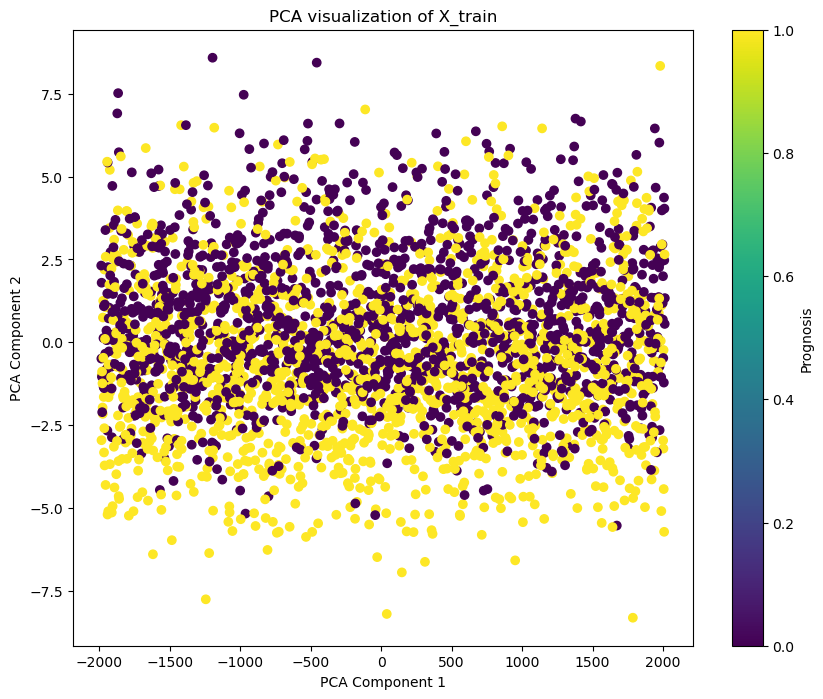

In [338]:

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_train)

# Create a scatter plot of the PCA embedding
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.colorbar(label='Prognosis')
plt.title('PCA visualization of X_train')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [339]:
def draw_histograms(dataset):
    for column in dataset.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(dataset[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

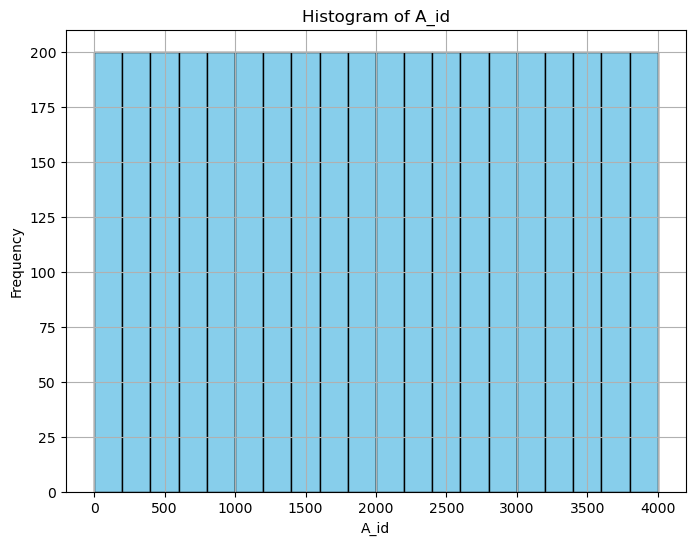

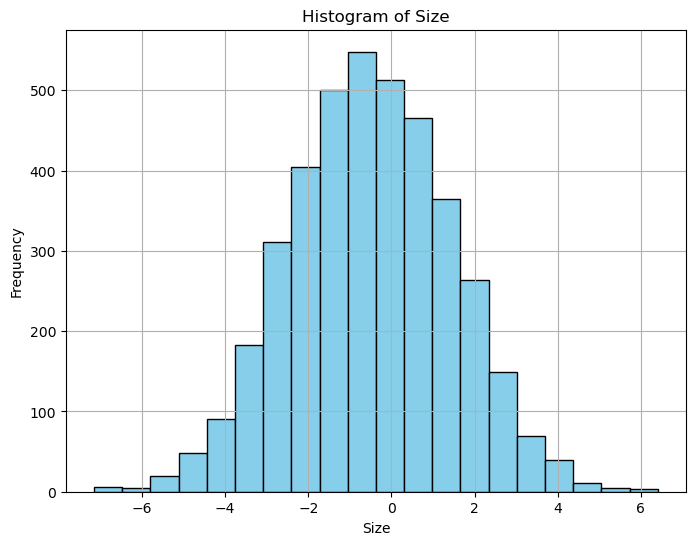

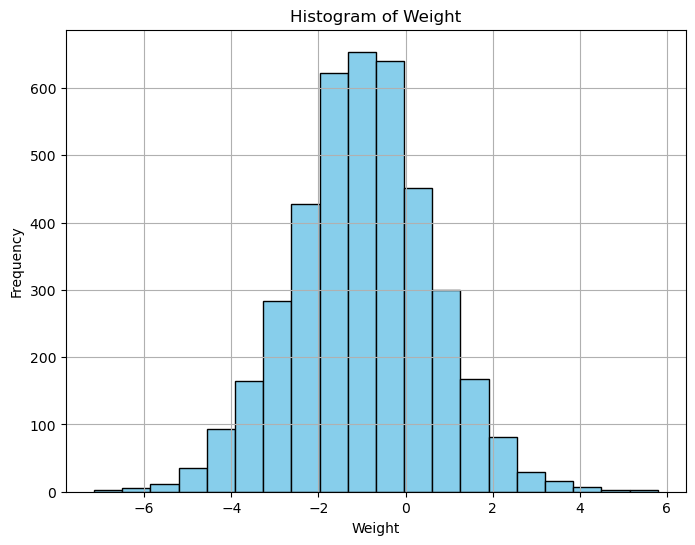

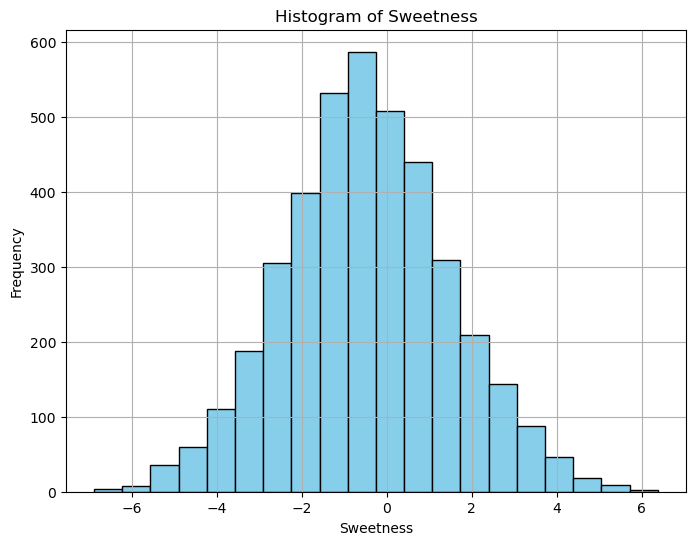

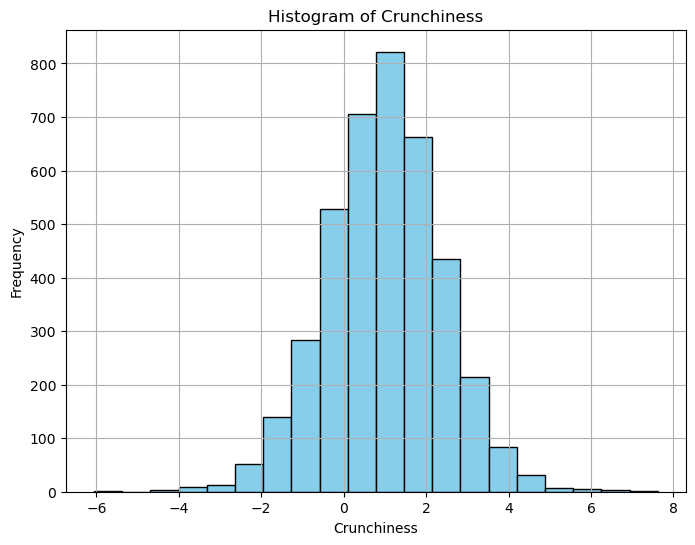

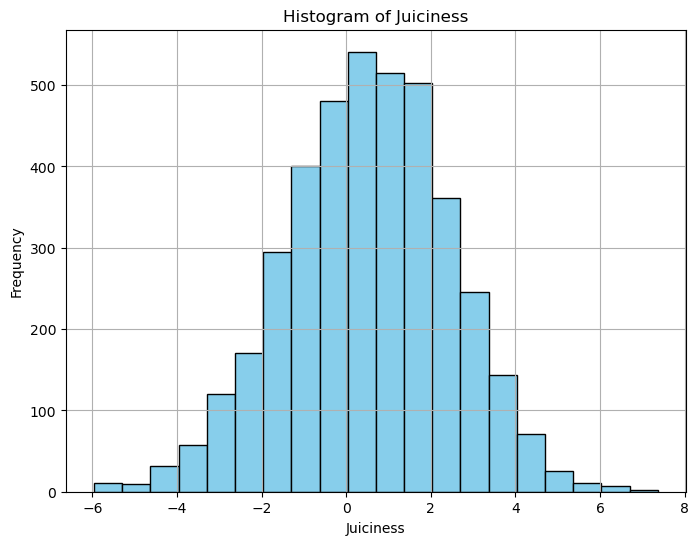

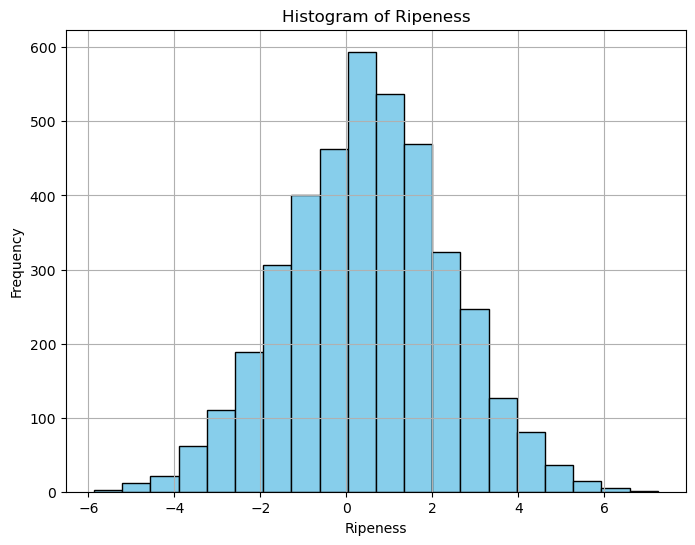

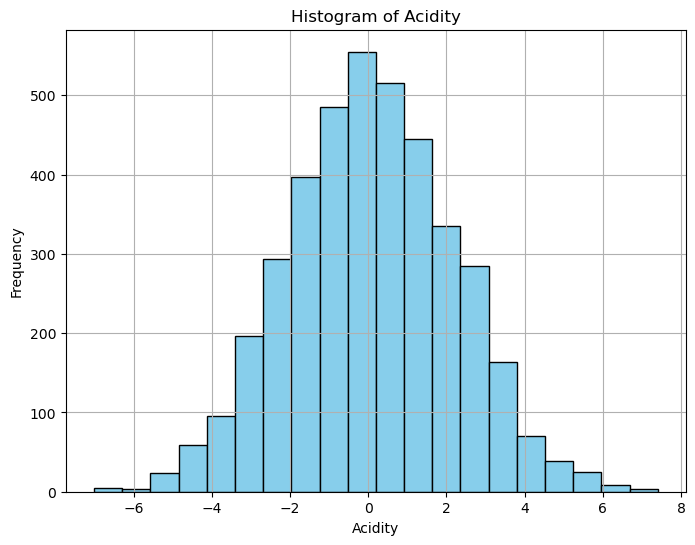

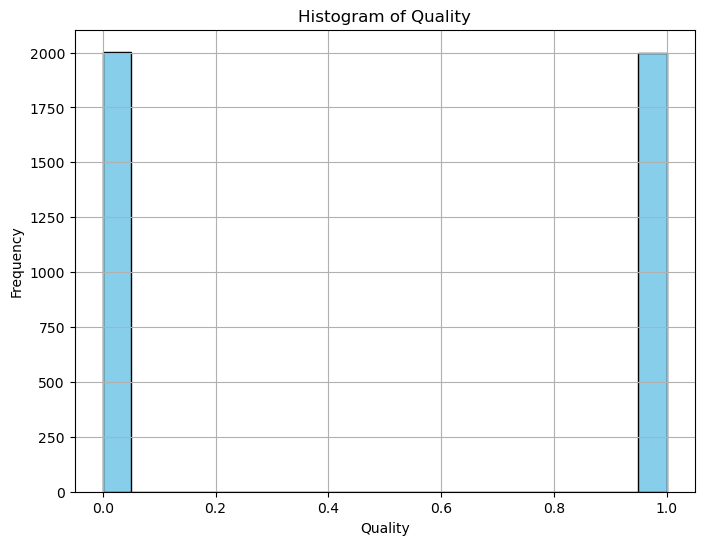

In [340]:
draw_histograms(df)

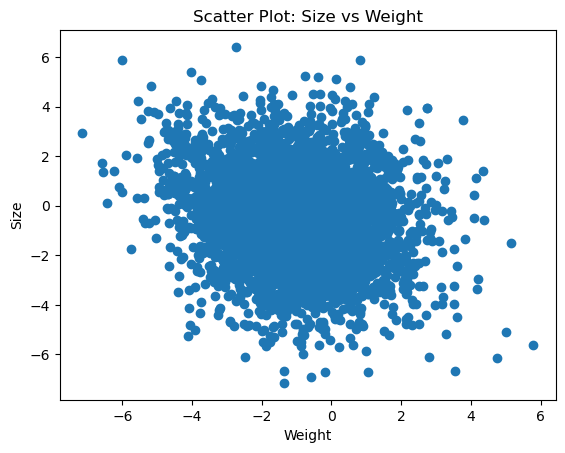

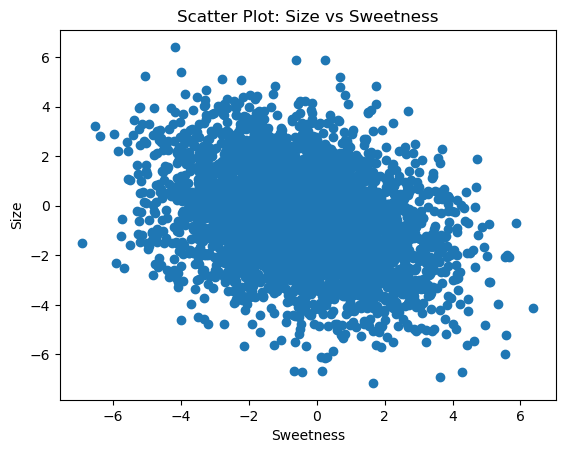

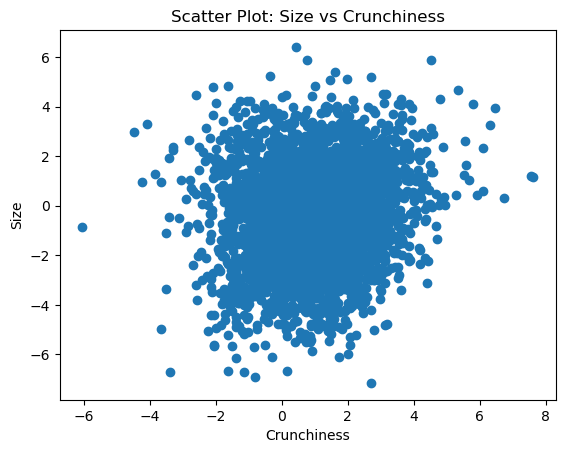

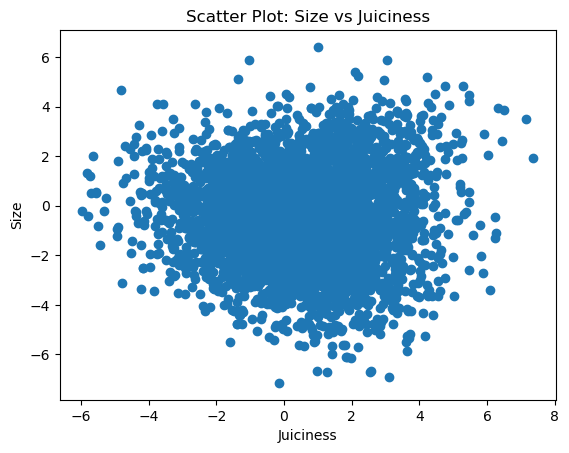

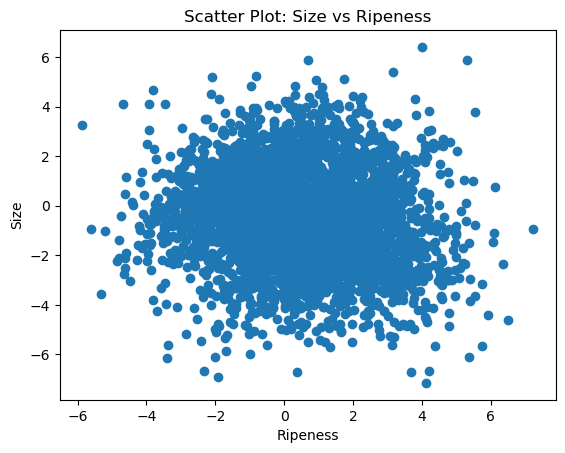

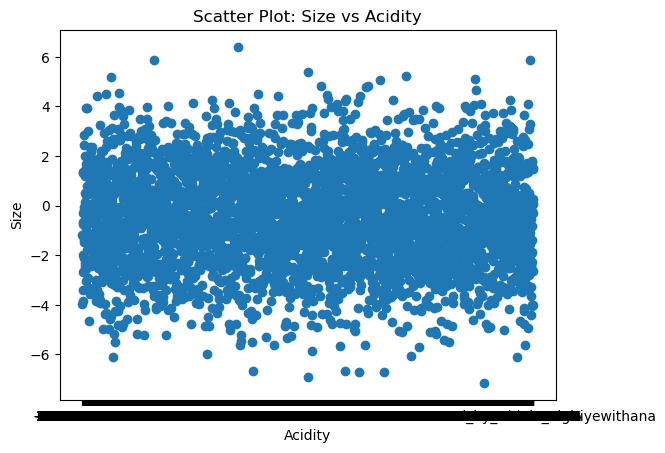

In [249]:
fea=['Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']
for i in fea :
  plt.scatter(df[i], df['Size'])
  plt.xlabel(i)
  plt.ylabel('Size')
  plt.title(f'Scatter Plot: Size vs {i}')
  plt.show()

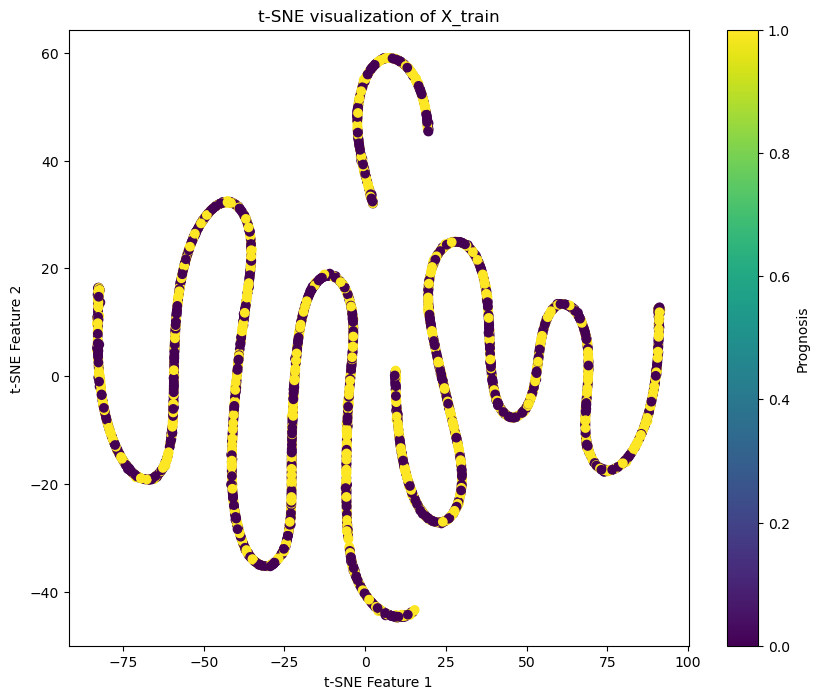

In [250]:

tsne = TSNE(random_state=42)

# Fit and transform X_train
X_tsne = tsne.fit_transform(X_train)

# Create a scatter plot of the t-SNE embedding
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis')
plt.colorbar(label='Prognosis')
plt.title('t-SNE visualization of X_train')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

<AxesSubplot: >

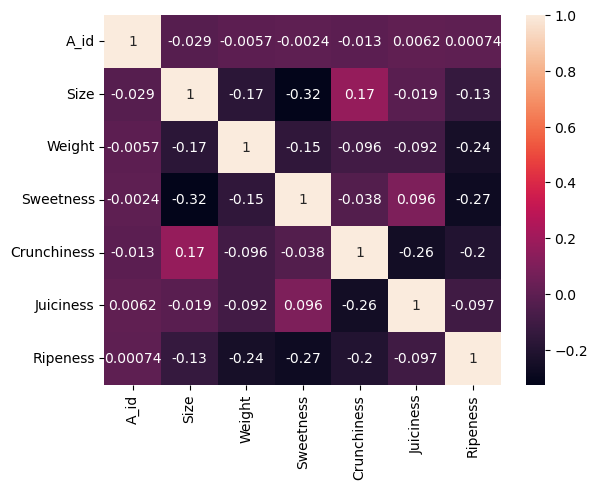

In [259]:
sns.heatmap(cm,cbar=True,annot=True)

In [260]:
df['Acidity']

0      -0.491590
1      -0.722809
2       2.621636
3       0.790723
4       0.501984
          ...   
3995    0.137784
3996    1.854235
3997   -1.334611
3998   -2.229720
3999    1.599796
Name: Acidity, Length: 4000, dtype: float64

In [261]:
value_to_remove = "Created_by_Nidula_Elgiriyewithana"
df = df[df['Acidity'] != value_to_remove]

In [262]:
df['Acidity'] = [float(item) for item in df['Acidity']]

In [263]:
df['Quality'] = pd.factorize(df['Quality'])[0]

In [264]:
X = df.drop(['Quality'],axis=1).values
y = df['Quality'].values

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 312.5 KB


In [266]:
[sum(y==0), sum(y==1)]

[2004, 1996]

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=0)

In [268]:
MMS=MinMaxScaler()

In [269]:
X_train_scaled=MMS.fit_transform(X_train)
X_test_scaled=MMS.transform(X_test)

In [270]:
std=StandardScaler()


In [271]:
log=LogisticRegression()

In [272]:
clf = Pipeline([('cls', LogisticRegression(random_state=0))])

In [273]:
param={
    'cls__C':[0.001,0.0002,0.125,0.3,0.4,0.6,0.8,0.9]
}

In [274]:
grid=GridSearchCV(clf,param_grid=param).fit(X_train_scaled,y_train)


In [275]:
y_pred=grid.predict(X_test_scaled)

In [276]:
accuracy_score(y_test,y_pred)

0.75875

In [277]:
# print("CV Accuracy = " + str(grid.best_score_) + " Test Accuracy = " + str(sum(grid==y_test)/len(y_test)))

In [278]:
print("CV Accuracy = " + str(grid.best_score_) + " Test Accuracy = " + str(sum(grid.predict(X_test) == y_test) / len(y_test)))


CV Accuracy = 0.7440625 Test Accuracy = 0.5375


In [283]:
pipeline = Pipeline([
    ('cls', RandomForestClassifier(n_jobs=-1, random_state=42))
])
param_grid = {
    'cls__n_estimators': [100, 200, 300],
    'cls__max_depth': [ 10, 20],
    'cls__min_samples_split': [2, 5, 10],
    'cls__min_samples_leaf': [1, 2, 4]
}

In [284]:

# Define parameter grid


# Initialize GridSearchCV with pipeline and parameter grid, specifying scoring='accuracy'
Rand = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to your data
Rand.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=Pipeline(steps=[('cls',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'cls__max_depth': [10, 20],
                         'cls__min_samples_leaf': [1, 2, 4],
                         'cls__min_samples_split': [2, 5, 10],
                         'cls__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [285]:
Y_pred=Rand.predict(X_test_scaled)

In [286]:
accuracy_score(y_test,Y_pred)

0.89375

In [287]:
print("CV Accuracy = " + str(Rand.best_score_) + " Test Accuracy = " + str(sum(Rand.predict(X_test) == y_test) / len(y_test)))


CV Accuracy = 0.8759375 Test Accuracy = 0.7225


In [288]:
clf=Pipeline([[
    'cls',ExtraTreesClassifier(n_jobs=-1,random_state=2)
]])

In [289]:
params = {
#"fs__max_features": [5,7],       
"cls__n_estimators": [50, 100, 200, 500],     
}

In [290]:

clf = GridSearchCV(clf, params,n_jobs=-1).fit(X_train_scaled, y_train)

In [291]:
yp = clf.predict(X_test_scaled) 
print("Extra Tree Classifier")
print("CV Accuracy = " + str(clf.best_score_) + " Test Accuracy = " + str(sum(yp==y_test)/len(y_test)))

Extra Tree Classifier
CV Accuracy = 0.8868750000000001 Test Accuracy = 0.9025


In [292]:
pipe=Pipeline([
    'cls',XGBClassifier(random_state=2)
])

In [293]:
params={
        'cls__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'cls__max_depth': [3, 5, 7],  # Maximum depth of a tree
    'cls__min_child_weight': [1, 3, 5],  # Minimum sum of instance weight (hessian) needed in a child
    'cls__gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'cls__subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instance
    'cls__colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'cls__reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
    'cls__reg_lambda': [0, 0.1, 0.5],
    'cls__n_estimators':[100,60,200,300,400,500,900],
    
}

In [294]:
Xg=GridSearchCV(pipe,n_jobs=-1,param_grid=params,verbose=2)

In [295]:
%%time
Xg.fit(X_train_scaled,y_train)

TypeError: 'XGBClassifier' object is not subscriptable

In [296]:
xgb_clf = XGBClassifier(random_state=2)

# Define the pipeline
pipe = Pipeline([
    ('cls', xgb_clf)
])

In [297]:
params = {
    'cls__learning_rate': [0.01, 0.1, 0.2],
    'cls__max_depth': [3, 5, 7],
    'cls__min_child_weight': [1, 3, 5],
    'cls__gamma': [0, 0.1, 0.2],
    'cls__subsample': [0.6, 0.8, 1.0],
    'cls__colsample_bytree': [0.6, 0.8, 1.0],
    'cls__reg_alpha': [0, 0.1, 0.5],
    'cls__reg_lambda': [0, 0.1, 0.5],
    'cls__n_estimators': [100, 60, 200, 300, 400, 500, 900]
}

In [298]:
Xg = GridSearchCV(pipe, n_jobs=-1, param_grid=params, verbose=2)


In [299]:

# Fit the GridSearchCV object to your data
Xg.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 45927 candidates, totalling 229635 fits


KeyboardInterrupt: 

In [300]:
Xg.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [301]:
Xg.best_params_


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [302]:
{'cls__colsample_bytree': 1.0,
 'cls__gamma': 0,
 'cls__learning_rate': 0.1,
 'cls__max_depth': 7,
 'cls__min_child_weight': 1,
 'cls__n_estimators': 400,
 'cls__reg_alpha': 0,
 'cls__reg_lambda': 0.5,
 'cls__subsample': 0.8}

{'cls__colsample_bytree': 1.0,
 'cls__gamma': 0,
 'cls__learning_rate': 0.1,
 'cls__max_depth': 7,
 'cls__min_child_weight': 1,
 'cls__n_estimators': 400,
 'cls__reg_alpha': 0,
 'cls__reg_lambda': 0.5,
 'cls__subsample': 0.8}

In [303]:
XG=Xg.predict(X_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [304]:
accuracy_score(y_test,XG)

0.71375

In [305]:
params = {
    'objective': 'multi:softmax',  # Specify the objective function for multiclass classification
    'num_class': len(set(y_train)),  # Number of classes in the dataset
    'eval_metric': 'merror',  # Evaluation metric: multiclass error rate
    'learning_rate': 0.1,  # Step size shrinkage used in boosting
    'n_estimators': 100,  # Number of boosting rounds or trees to build
    'max_depth': 3,  # Maximum depth of a tree
    'min_child_weight': 1,  # Minimum sum of weights of all observations required in a child
    'gamma': 0,  # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': 1,  # Fraction of samples used to fit each tree
    'colsample_bytree': 1,  # Fraction of features randomly selected for each tree
    'colsample_bylevel': 1,  # Fraction of features randomly selected for each level
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 1,  # L2 regularization term on weights
    'sampling_method': 'uniform',  # Method used for sampling in the tree construction process
}

In [306]:

# Initialize XGBoost classifier
model = xgb.XGBClassifier(**params)

In [307]:

model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='merror', feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=2,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [308]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


In [309]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [310]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8625
Precision: 0.8628426275253236
Recall: 0.8624616403852523
F1 Score: 0.8624578777250533


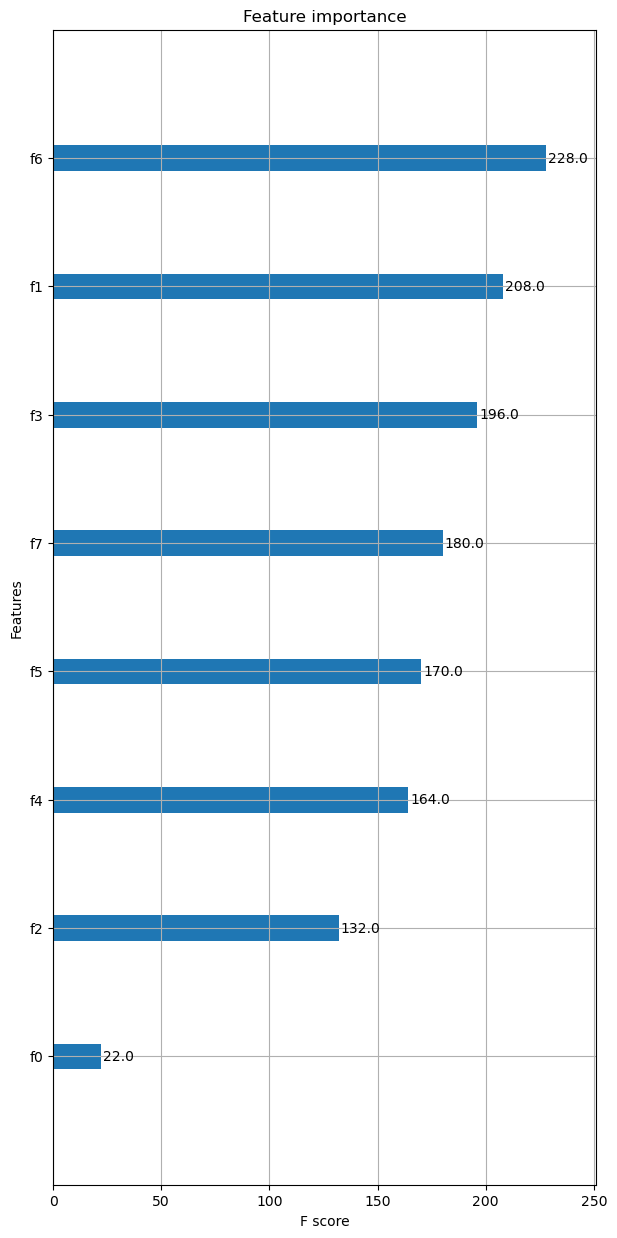

In [311]:
fig, ax = plt.subplots(figsize = (7, 15))
xgb.plot_importance(model, ax = ax)
plt.show()

In [312]:

# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', gamma='auto', random_state=42)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)


# Calculate evaluation metrics

SVC(gamma='auto', random_state=42)

In [313]:

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

In [314]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train is your target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', gamma='auto', random_state=42)


In [315]:

svm_model.fit(X_train_scaled, y_train_encoded)


SVC(gamma='auto', random_state=42)

In [316]:

# Make predictions on the test set
y_pred_svm_encoded = svm_model.predict(X_test_scaled)

# Decode the predictions if needed
y_pred_svm = label_encoder.inverse_transform(y_pred_svm_encoded)

# Now you can calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average=None)
recall_svm = recall_score(y_test, y_pred_svm, average=None)
f1_svm = f1_score(y_test, y_pred_svm, average=None)

print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Print precision, recall, and F1-score for each class separately
unique_classes = label_encoder.classes_
for label, prec, rec, f1_val in zip(unique_classes, precision_svm, recall_svm, f1_svm):
    print(f"Class: {label}")
    print(f"   Precision: {prec:.4f}")
    print(f"   Recall: {rec:.4f}")
    print(f"   F1 Score: {f1_val:.4f}")


SVM Accuracy: 0.7662
Class: 0
   Precision: 0.7465
   Recall: 0.8080
   F1 Score: 0.7760
Class: 1
   Precision: 0.7896
   Recall: 0.7243
   F1 Score: 0.7556


In [317]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [318]:
random_forest = RandomForestClassifier(random_state=42,n_jobs=-1)


In [319]:
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [320]:
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [321]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [322]:
best_model = grid_search.best_estimator_


In [323]:
y_pred = best_model.predict(X_test_scaled)


In [324]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.885


In [329]:
base_dt = DecisionTreeClassifier(random_state=42)
base_rf = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)
base_knn = KNeighborsClassifier(n_jobs=-1)
base_svc = SVC(kernel='linear', random_state=42)


In [330]:

# Define bagging classifiers for each base classifier
bagging_dt = BaggingClassifier(base_estimator=base_dt, n_estimators=10, random_state=42)
bagging_rf = BaggingClassifier(base_estimator=base_rf, n_estimators=10, random_state=42)
bagging_knn = BaggingClassifier(base_estimator=base_knn, n_estimators=10, random_state=42)
bagging_svc = BaggingClassifier(base_estimator=base_svc, n_estimators=10, random_state=42)

In [331]:


# Train and evaluate each bagging classifier
for bagging_clf, clf_name in zip([bagging_dt, bagging_rf, bagging_knn, bagging_svc],
                                 ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine']):
    bagging_clf.fit(X_train_scaled, y_train)
    y_pred = bagging_clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{clf_name} Bagging Accuracy: {accuracy:.4f}")

C:\Users\Siku\miniconda3\envs\main\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Decision Tree Bagging Accuracy: 0.8600


C:\Users\Siku\miniconda3\envs\main\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random Forest Bagging Accuracy: 0.8862


C:\Users\Siku\miniconda3\envs\main\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


K-Nearest Neighbors Bagging Accuracy: 0.8700


C:\Users\Siku\miniconda3\envs\main\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Support Vector Machine Bagging Accuracy: 0.7625


## ADABOOST

In [332]:

# Defining a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), SVC(kernel='linear')],
    'random_state': [42]
}

In [333]:
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=3, scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

C:\Users\Siku\miniconda3\envs\main\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Siku\miniconda3\envs\main\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Siku\miniconda3\envs\main\Lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 142, in fit
    self._validate_estimator()
  File "C:\Users\Siku\miniconda3\envs\main\Lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 517, in _validate_estimator
    rais

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2),
                                            SVC(kernel='linear')],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200], 'random_state': [42]},
             scoring='accuracy')

In [334]:


# Getting the best parameters and best score from grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [335]:


print("Best Parameters:", best_params)
print("Best Score:", best_score)



Best Parameters: {'algorithm': 'SAMME.R', 'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.5, 'n_estimators': 100, 'random_state': 42}
Best Score: 0.8399992849326517


In [336]:

# Using the best parameters to train the AdaBoost classifier
best_ada_boost = AdaBoostClassifier(**best_params)
best_ada_boost.fit(X_train_scaled, y_train)

C:\Users\Siku\miniconda3\envs\main\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [337]:

# Making predictions on the test set using the best classifier
y_pred = best_ada_boost.predict(X_test_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.84625
